In [35]:
# importing relevent libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [36]:
# loading the cleaned dataset
data = pd.read_csv('icu_data.csv')
data.head()

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,isin_african american,isin_asian,isin_caucasian,isin_hispanic,isin_native american,isin_other/unknown,isin_f,isin_m,isin_ccu-cticu,isin_csicu,isin_cticu,isin_cardiac icu,isin_micu,isin_med-surg icu,isin_neuro icu,isin_sicu,isin_cardiovascular,isin_gastrointestinal,isin_genitourinary,isin_gynecological,isin_hematological,isin_metabolic,isin_musculoskeletal/skin,isin_neurological,isin_respiratory,isin_sepsis,isin_trauma,isin_haematologic,isin_neurologic,isin_renal/genitourinary,isin_undefined diagnoses
0,0,68.0,22.730000,0,180.3,0.541667,73.9,113.0,502.01,0,0,31.0,2.51,3.0,6.0,0,4.0,168.0,118.0,27.4,0,40.0,36.0,134.0,39.3,0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,77.0,27.420000,0,160.0,0.927778,70.2,108.0,203.01,0,0,9.0,0.56,1.0,3.0,0,1.0,145.0,120.0,36.9,0,46.0,33.0,145.0,35.1,1,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,67.0,27.560000,0,190.5,0.000694,100.0,301.0,403.01,0,0,13.0,0.71,4.0,6.0,0,5.0,156.0,113.0,44.2,0,130.0,35.0,137.0,36.6,0,10.9,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,111.0,111.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,143.0,143.0,36.7,36.7,13.0,13.0,8.8,8.8,0.71,0.71,156.0,125.0,27.0,27.0,15.6,15.6,44.2,44.2,159.0,159.0,3.9,3.7,137.0,137.0,10.9,10.9,0.05,0.02,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0,46.0,25.845717,0,167.6,0.000000,72.6,108.0,203.01,0,0,15.0,1.00,1.0,4.0,0,1.0,143.0,114.0,44.2,1,113.0,34.0,132.0,36.4,1,9.7,89.0,61.0,89.0,61.0,98.0,64.0,113.0,76.0,113.0,76.0,22.0,9.0,100.0,88.0,169.0,102.0,169.0,102.0,37.1,36.4,89.0,63.0,89.0,63.0,94.0,80.0,104.0,88.0,104.0,88.0,21.0,9.0,99.0,95.0

In [37]:
data['hospital_death']

0        0
1        0
2        0
3        0
4        0
        ..
53108    0
53109    0
53110    0
53111    0
53112    0
Name: hospital_death, Length: 53113, dtype: int64

In [38]:
# separating target and predictor variables
data_y = data['hospital_death']
data_x = data.drop('hospital_death',axis=1)

In [39]:
data_x.head()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,isin_african american,isin_asian,isin_caucasian,isin_hispanic,isin_native american,isin_other/unknown,isin_f,isin_m,isin_ccu-cticu,isin_csicu,isin_cticu,isin_cardiac icu,isin_micu,isin_med-surg icu,isin_neuro icu,isin_sicu,isin_cardiovascular,isin_gastrointestinal,isin_genitourinary,isin_gynecological,isin_hematological,isin_metabolic,isin_musculoskeletal/skin,isin_neurological,isin_respiratory,isin_sepsis,isin_trauma,isin_haematologic,isin_neurologic,isin_renal/genitourinary,isin_undefined diagnoses
0,68.0,22.730000,0,180.3,0.541667,73.9,113.0,502.01,0,0,31.0,2.51,3.0,6.0,0,4.0,168.0,118.0,27.4,0,40.0,36.0,134.0,39.3,0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,77.0,27.420000,0,160.0,0.927778,70.2,108.0,203.01,0,0,9.0,0.56,1.0,3.0,0,1.0,145.0,120.0,36.9,0,46.0,33.0,145.0,35.1,1,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,67.0,27.560000,0,190.5,0.000694,100.0,301.0,403.01,0,0,13.0,0.71,4.0,6.0,0,5.0,156.0,113.0,44.2,0,130.0,35.0,137.0,36.6,0,10.9,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,111.0,111.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,143.0,143.0,36.7,36.7,13.0,13.0,8.8,8.8,0.71,0.71,156.0,125.0,27.0,27.0,15.6,15.6,44.2,44.2,159.0,159.0,3.9,3.7,137.0,137.0,10.9,10.9,0.05,0.02,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,46.0,25.845717,0,167.6,0.000000,72.6,108.0,203.01,0,0,15.0,1.00,1.0,4.0,0,1.0,143.0,114.0,44.2,1,113.0,34.0,132.0,36.4,1,9.7,89.0,61.0,89.0,61.0,98.0,64.0,113.0,76.0,113.0,76.0,22.0,9.0,100.0,88.0,169.0,102.0,169.0,102.0,37.1,36.4,89.0,63.0,89.0,63.0,94.0,80.0,104.0,88.0,104.0,88.0,21.0,9.0,99.0,95.0,169.0,115.0,169.0,115.

In [40]:
data_y.value_counts()

0    48461
1     4652
Name: hospital_death, dtype: int64

In [41]:
# splitting the dataset into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,  test_size=0.2, shuffle = True, random_state = 8)

In [42]:
X_train.shape, X_test.shape

((42490, 129), (10623, 129))

In [43]:
pd.set_option('display.max_columns', None)

In [44]:
X_train.head()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,isin_african american,isin_asian,isin_caucasian,isin_hispanic,isin_native american,isin_other/unknown,isin_f,isin_m,isin_ccu-cticu,isin_csicu,isin_cticu,isin_cardiac icu,isin_micu,isin_med-surg icu,isin_neuro icu,isin_sicu,isin_cardiovascular,isin_gastrointestinal,isin_genitourinary,isin_gynecological,isin_hematological,isin_metabolic,isin_musculoskeletal/skin,isin_neurological,isin_respiratory,isin_sepsis,isin_trauma,isin_haematologic,isin_neurologic,isin_renal/genitourinary,isin_undefined diagnoses
28981,69.0,31.972318,1,170.0,2.662500,92.4,308.0,1207.01,1,0,7.0,0.60,3.0,6.0,0,3.0,127.0,91.0,28.2,1,57.0,29.0,138.0,36.8,1,14.90,67.0,41.0,67.0,41.0,91.0,80.0,73.0,57.0,73.0,57.0,29.0,12.0,100.0,92.0,127.0,94.0,127.0,94.0,37.1,36.7,62.0,55.0,62.0,55.0,91.0,90.0,73.0,68.0,73.0,68.0,23.0,12.0,99.0,98.0,127.0,105.0,127.0,105.0,37.1,36.9,8.0,7.0,8.1,8.1,0.69,0.60,127.0,105.0,20.0,20.0,13.3,8.6,39.0,27.0,245.0,227.0,4.5,3.8,140.0,138.0,16.50,11.50,0.01,0.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34168,43.0,42.292992,0,167.6,0.169444,118.8,113.0,501.05,0,0,9.0,0.51,4.0,6.0,0,5.0,184.0,101.0,42.2,0,134.0,39.0,132.0,35.8,1,13.75,123.0,78.0,123.0,78.0,100.0,41.0,134.0,89.0,134.0,89.0,47.0,16.0,98.0,82.0,181.0,125.0,181.0,125.0,36.2,35.8,112.0,93.0,112.0,93.0,91.0,59.0,127.0,106.0,127.0,106.0,26.0,19.0,98.0,89.0,172.0,135.0,172.0,135.0,36.2,36.2,9.0,9.0,8.8,8.8,0.51,0.51,207.0,147.0,26.0,26.0,13.7,13.7,42.2,42.2,294.0,294.0,4.7,4.7,132.0,132.0,13.75,13.75,0.05,0.03,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
17273,30.0,21.527821,0,152.4,-0.004167,50.0,123.0,702.01,0,0,18.0,0.76,4.0,6.0,0,5.0,298.0,139.0,40.1,0,71.0,29.0,140.0,36.7,0,12.70,81.0,57.0,81.0,57.0,134.0,93.0,101.0,71.0,101.0,71.0,29.0,14.0,100.0,96.0,144.0,111.0,144.0,111.0,38.0,36.7,63.0,63.0,63.0,63.0,117.0,117.0,81.0,81.0,81.0,81.0,27.0,27.0,100.0,100.0,132.0,132.0,132.0,132.0,36.7,36.7,18.0,6.0,7.7,6.5,0.87,0.58,330.0,69.0,17.0,7.0,14.1,12.8,40.1,36.3,205.0,168.0,4.6,3.0,143.0,140.0,12.70,8.70,-1.00,-1.00,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
19501,70.0,30.782267,0,170.8,0.227083,89.8,110.0,110.01,0,0,14.0,0.93,4.0,6.0,0,5.0,79.0,92.0,39.1,0,117.0,26.0,134.0,36.0,0,8.00,114.0,63.0,114.0,63.0,90.0,72.0,117.0,72.0,117.0,72.0,25.0,13.0,97.0,75.0,139.0,95.0,139.0,95.0,36.9,36.0,71.0,63.0,71.0,63.0,73.0,72.0,81.0,72.0,81.0,72.0,13.0,13.0,75.0,75

### Standardizing the train and test data

In [45]:
from sklearn.preprocessing import MinMaxScaler
# creating an instance for MinMaxScaler
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [46]:
# storing the normalized data into a new dataframe
X_train_new = pd.DataFrame(X_train_std, columns= X_train.columns)
X_test_new = pd.DataFrame(X_test_std, columns= X_test.columns)

In [47]:
X_test_new.head()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,isin_african american,isin_asian,isin_caucasian,isin_hispanic,isin_native american,isin_other/unknown,isin_f,isin_m,isin_ccu-cticu,isin_csicu,isin_cticu,isin_cardiac icu,isin_micu,isin_med-surg icu,isin_neuro icu,isin_sicu,isin_cardiovascular,isin_gastrointestinal,isin_genitourinary,isin_gynecological,isin_hematological,isin_metabolic,isin_musculoskeletal/skin,isin_neurological,isin_respiratory,isin_sepsis,isin_trauma,isin_haematologic,isin_neurologic,isin_renal/genitourinary,isin_undefined diagnoses
0,0.794521,0.337382,0.0,0.733002,0.004253,0.457259,0.077295,0.002381,0.0,0.0,0.089431,0.048713,1.000000,1.0,0.0,1.0,0.176880,0.209459,0.846591,0.0,0.17500,0.142857,0.560976,0.592105,0.0,0.109131,0.403361,0.519481,0.403361,0.519481,0.210084,0.429530,0.314516,0.511111,0.322314,0.511111,0.141026,0.125000,0.977011,0.94,0.500000,0.588235,0.500000,0.588131,0.375000,0.780071,0.311321,0.406593,0.308411,0.402174,0.245763,0.268519,0.344828,0.405660,0.350877,0.405660,0.204082,0.124031,0.977778,0.96,0.581081,0.539007,0.581081,0.535211,0.524590,0.578125,0.090164,0.109002,0.478261,0.604167,0.045497,0.054991,0.120818,0.372549,0.535714,0.62500,0.846154,0.903509,0.823151,0.882006,0.211470,0.234645,0.238095,0.352941,0.485714,0.638889,0.102496,0.122506,0.515152,0.512690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.452055,0.383497,0.0,0.303134,0.004367,0.310448,0.053140,0.002857,0.0,0.0,0.008130,0.035846,1.000000,1.0,0.0,1.0,0.175094,0.445946,0.696023,0.0,0.47500,0.464286,0.414634,0.486842,0.0,0.316927,0.537815,0.740260,0.537815,0.740260,0.277311,0.483221,0.451613,0.711111,0.462810,0.711111,0.205128,0.145833,1.000000,0.95,0.507042,0.672269,0.507042,0.672186,0.375000,0.661648,0.688679,0.703297,0.682243,0.695652,0.381356,0.435185,0.577586,0.792453,0.587719,0.792453,0.183673,0.108527,1.000000,0.97,0.452703,0.588652,0.452703,0.584507,0.393443,0.453125,0.008197,0.018167,0.565217,0.687500,0.032498,0.040465,0.118959,0.274510,0.285714,0.40625,0.692308,0.763158,0.652733,0.725664,0.399642,0.429486,0.333333,0.529412,0.314286,0.472222,0.310383,0.355768,0.510101,0.512690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.136986,0.235238,0.0,0.652509,0.005812,0.307395,0.082126,0.239995,0.0,0.0,0.056911,0.050551,1.000000,1

In [48]:
X_train_new.shape

(42490, 129)

### Model 1: Creating the Basic Deep Learning Model 

In [15]:
model = Sequential()
# adding first layer and using relu as an activation function
model.add(Dense(64, input_shape=(X_train_new.shape[-1]), activation='relu'))
# adding second layer to the sequential model
model.add(Dense(32, activation='relu'))
# Adding third layer 
model.add(Dense(16, activation='relu'))
# adding output layer to the model using sigmoid activation function which seems to be ideal for binary classification problem
model.add(Dense(1, activation='sigmoid'))

In [16]:
# printing the model summary just to get an idea about how many paramters are required for the current model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                8320      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 10,945
Trainable params: 10,945
Non-trainable params: 0
_________________________________________________________________


In [17]:
# metrics that might be useful for present project
metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')
]


### Compiling the model
### choosing an appropirate optimiser and loss function
model.compile(optimizer=keras.optimizers.Adam(0.01),
              loss='binary_crossentropy',
              metrics=metrics)

In [18]:
### Training the model
epochs = 20
batch_size = 32
history = model.fit(X_train_new.values,y_train, validation_data = (X_test_new.values, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
1328/1328 [==============================] - 4s 2ms/step - loss: 0.2295 - precision: 0.5934 - recall: 0.1350 - auc: 0.8363 - val_loss: 0.2089 - val_precision: 0.6019 - val_recall: 0.2785 - val_auc: 0.8676
Epoch 2/20
1328/1328 [==============================] - 3s 2ms/step - loss: 0.2173 - precision: 0.6587 - recall: 0.2070 - auc: 0.8584 - val_loss: 0.2107 - val_precision: 0.6447 - val_recall: 0.2467 - val_auc: 0.8713
Epoch 3/20
1328/1328 [==============================] - 3s 2ms/step - loss: 0.2140 - precision: 0.6611 - recall: 0.2222 - auc: 0.8639 - val_loss: 0.2076 - val_precision: 0.6598 - val_recall: 0.2467 - val_auc: 0.8717
Epoch 4/20
1328/1328 [==============================] - 2s 2ms/step - loss: 0.2126 - precision: 0.6600 - recall: 0.2366 - auc: 0.8658 - val_loss: 0.2066 - val_precision: 0.6184 - val_recall: 0.2807 - val_auc: 0.8725
Epoch 5/20
1328/1328 [==============================] - 2s 2ms/step - loss: 0.2104 - precision: 0.6781 - recall: 0.2489 - auc: 0.8689 - 

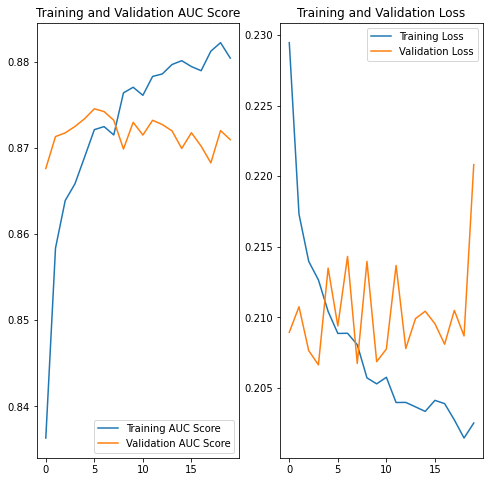

In [19]:
acc = history.history['auc']
val_acc = history.history['val_auc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC Score')
plt.plot(epochs_range, val_acc, label='Validation AUC Score')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC Score')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Conclusion from Model 1:
- There is a large fluctuation in the validation loss using this model.
- The recall evaluation metric is also not giving very good results

### Model 2: Using Dropouts

In [49]:
model = Sequential()

model.add(Dense(64, input_shape=(X_train_new.shape[-1],), activation='relu'))
# using dropouts after every layer which prevents overfitting in most of the cases.
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                8320      
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 10,945
Trainable params: 10,945
Non-trai

In [51]:
metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')
]


### Compiling the model
### choosing an appropirate optimiser and loss function
model.compile(optimizer=keras.optimizers.Adam(0.01),
              loss='binary_crossentropy',
              metrics=metrics)

In [52]:
### Training the model
epochs = 20
batch_size = 32
history = model.fit(X_train_new.values,y_train, validation_data = (X_test_new.values, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
1328/1328 [==============================] - 4s 2ms/step - loss: 0.2572 - precision: 0.4785 - recall: 0.0476 - auc_5: 0.7934 - val_loss: 0.2231 - val_precision: 1.0000 - val_recall: 0.0033 - val_auc_5: 0.8645
Epoch 2/20
1328/1328 [==============================] - 3s 2ms/step - loss: 0.2407 - precision: 0.5695 - recall: 0.0799 - auc_5: 0.8269 - val_loss: 0.2266 - val_precision: 0.7273 - val_recall: 0.0088 - val_auc_5: 0.8572
Epoch 3/20
1328/1328 [==============================] - 3s 2ms/step - loss: 0.2363 - precision: 0.5744 - recall: 0.1104 - auc_5: 0.8326 - val_loss: 0.2213 - val_precision: 0.7264 - val_recall: 0.0844 - val_auc_5: 0.8651
Epoch 4/20
1328/1328 [==============================] - 3s 2ms/step - loss: 0.2350 - precision: 0.5903 - recall: 0.1005 - auc_5: 0.8385 - val_loss: 0.2235 - val_precision: 1.0000 - val_recall: 0.0055 - val_auc_5: 0.8658
Epoch 5/20
1328/1328 [==============================] - 3s 2ms/step - loss: 0.2325 - precision: 0.5956 - recall: 0.1083 

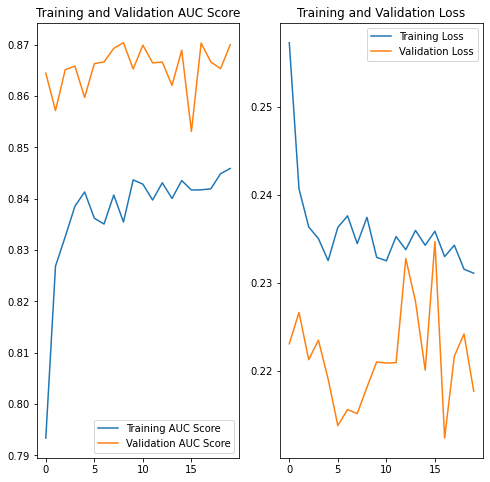

In [54]:
acc = history.history['auc_5']
val_acc = history.history['val_auc_5']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC Score')
plt.plot(epochs_range, val_acc, label='Validation AUC Score')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC Score')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Conclusions from Model 2:
- Although the training and validation accuracy score is acceptable using dropouts but the model is not giving good results in case of validation loss which is fluctuating same as compared to previous model.
- The recall score is very poor in this case. Thus, the model will not be able to predict actual positive values using this model. 

### Model 3: Dealing with Class Imbalance
- Class Imbalance is a major issue when dealing with classification problem since one class dominates the other class with a large number.
- Keras can be used to deal with class imbalance problem by specifying the weights to the classes.
- Class with lesser number of samples can be given more weightage as compared to dominant class.

In [27]:
model = Sequential()

model.add(Dense(64, input_shape=(X_train_new.shape[-1],), activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [28]:
metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')
]


### Compiling the model
### choosing an appropirate optimiser and loss function
model.compile(optimizer=keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=metrics)

In [29]:
# callbacks = [keras.callbacks.ModelCheckpoint("patient_model_at_epoch_{epoch}.h5")]
# specifying the weights for the two classes with class 1 given higher weight value than class 0 and then using this class_weight in training the model
class_weight = {0: 0.5, 1: 5}

In [30]:
### Training the model
epochs = 20
batch_size = 32
history = model.fit(X_train_new.values,y_train, validation_data = (X_test_new.values, y_test), epochs=epochs, batch_size=batch_size,class_weight=class_weight)

Epoch 1/20
1328/1328 [==============================] - 4s 2ms/step - loss: 0.4371 - precision: 0.2412 - recall: 0.7516 - auc_3: 0.8447 - val_loss: 0.3779 - val_precision: 0.3012 - val_recall: 0.7138 - val_auc_3: 0.8674
Epoch 2/20
1328/1328 [==============================] - 3s 2ms/step - loss: 0.4126 - precision: 0.2483 - recall: 0.7850 - auc_3: 0.8634 - val_loss: 0.3756 - val_precision: 0.2897 - val_recall: 0.7226 - val_auc_3: 0.8692
Epoch 3/20
1328/1328 [==============================] - 3s 2ms/step - loss: 0.4055 - precision: 0.2573 - recall: 0.7882 - auc_3: 0.8690 - val_loss: 0.5499 - val_precision: 0.2180 - val_recall: 0.8421 - val_auc_3: 0.8747
Epoch 4/20
1328/1328 [==============================] - 3s 2ms/step - loss: 0.3958 - precision: 0.2660 - recall: 0.7933 - auc_3: 0.8753 - val_loss: 0.4735 - val_precision: 0.2400 - val_recall: 0.8092 - val_auc_3: 0.8715
Epoch 5/20
1328/1328 [==============================] - 3s 2ms/step - loss: 0.3918 - precision: 0.2676 - recall: 0.7984 

#### Conclusion from model 3: 
- The recall score has improved as compared to the previous models.
- The model seems more stable with acceptable AUC score. 
- Overfitting of the model can also be avoided when after dealing with class imbalance. 

### Model 4: Using Keras Tuner
- Using Keras Tuner hyperparamter tuning can be done in deep learning models as well.
- In this case it is always advisable to focus on loss values of both the training and validation data since a model is considered more stable when the loss decreases with each epoch


In [45]:
import kerastuner as kt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [46]:
#!pip install keras-tuner

In [60]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=[129]))

      # Tune the number of units in the first Dense layer
      # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

      # Tune the learning rate for the optimizer
      # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    metrics = [
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall"),
        keras.metrics.AUC(curve='ROC')]

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                    loss=keras.losses.BinaryCrossentropy(),
                    metrics=metrics)

    return model

In [75]:
tuner = kt.RandomSearch(
    model_builder,
    objective='val_loss',
    max_trials=5)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [76]:
 # using early stopping to stop training the model when optimal value of recall and loss values are achieved.
 stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_recall', patience=5)

In [77]:
tuner.search(X_train_new.values, y_train, epochs=30, validation_data = (X_test_new.values, y_test), callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 5 Complete [00h 01m 22s]
val_loss: 0.20162032544612885

Best val_loss So Far: 0.2004547119140625
Total elapsed time: 00h 04m 51s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit



The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 416 and the optimal learning rate for the optimizer
is 0.0001.



### Final Model after using Keras Tuner with optimal learning rate and number of units

In [78]:
model = Sequential()

model.add(Dense(416, input_shape=(X_train_new.shape[-1],), activation='relu'))

model.add(Dense(416, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [79]:
metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')
]


### Compiling the model
### choosing an appropirate optimiser and loss function
model.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss='binary_crossentropy',
              metrics=metrics)

In [80]:
### Training the model
epochs = 20
batch_size = 32
history = model.fit(X_train_new.values,y_train, validation_data = (X_test_new.values, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
1328/1328 [==============================] - 9s 6ms/step - loss: 0.2290 - precision: 0.6514 - recall: 0.1668 - auc_1: 0.8365 - val_loss: 0.2082 - val_precision: 0.6889 - val_recall: 0.2039 - val_auc_1: 0.8689
Epoch 2/20
1328/1328 [==============================] - 7s 5ms/step - loss: 0.2112 - precision: 0.6660 - recall: 0.2511 - auc_1: 0.8672 - val_loss: 0.2043 - val_precision: 0.6867 - val_recall: 0.2379 - val_auc_1: 0.8743
Epoch 3/20
1328/1328 [==============================] - 8s 6ms/step - loss: 0.2072 - precision: 0.6675 - recall: 0.2717 - auc_1: 0.8730 - val_loss: 0.2037 - val_precision: 0.6844 - val_recall: 0.2401 - val_auc_1: 0.8747
Epoch 4/20
1328/1328 [==============================] - 7s 5ms/step - loss: 0.2035 - precision: 0.6798 - recall: 0.2810 - auc_1: 0.8789 - val_loss: 0.2014 - val_precision: 0.6804 - val_recall: 0.2895 - val_auc_1: 0.8791
Epoch 5/20
1328/1328 [==============================] - 7s 5ms/step - loss: 0.2010 - precision: 0.6788 - recall: 0.2893 

#### Conclusion from the Final Model:
- The validation loss has decreased significantly.
- The precision and recall metrics are improved to some extent.
- The model is more generalized
- learning rate and number of units used are not random but calculated using proper methods. 